In [49]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.experimental import enable_halving_search_cv

In [22]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data',
                header=None)

In [23]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_


array(['B', 'M'], dtype=object)

In [24]:
le.transform(['M', 'B'])

array([1, 0])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=1)

In [26]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.956


In [27]:
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print(f'Fold: {k+1:02d}, '
  f'Class distr.: {np.bincount(y_train[train])}, '
  f'Acc.: {score:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 0.935
Fold: 02, Class distr.: [256 153], Acc.: 0.935
Fold: 03, Class distr.: [256 153], Acc.: 0.957
Fold: 04, Class distr.: [256 153], Acc.: 0.957
Fold: 05, Class distr.: [256 153], Acc.: 0.935
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.978
Fold: 08, Class distr.: [257 153], Acc.: 0.933
Fold: 09, Class distr.: [257 153], Acc.: 0.956
Fold: 10, Class distr.: [257 153], Acc.: 0.956


In [28]:
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')


CV accuracy: 0.950 +/- 0.014


In [29]:
scores = cross_val_score(estimator=pipe_lr,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          n_jobs=1)
print(f'CV accuracy scores: {scores}')

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [30]:
print(f'CV accuracy: {np.mean(scores):.3f} 'f'+/- {np.std(scores):.3f}')

CV accuracy: 0.950 +/- 0.014


![](https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/bf62496f44a92a21d23250d5ed13d2d2e617e0e2/ch06/images/06_04.png)

## Learning curve

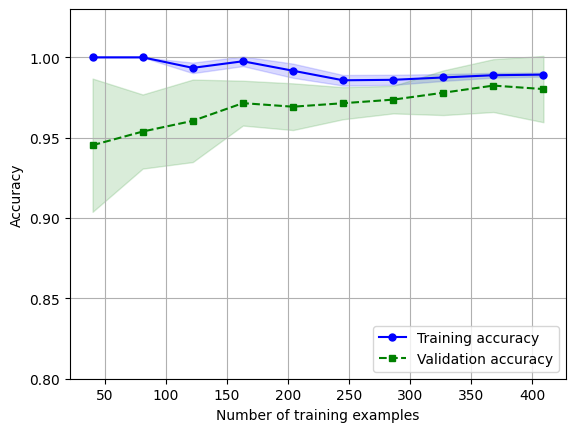

In [31]:
pipe_lr = make_pipeline(StandardScaler(),
    LogisticRegression(penalty='l2',
    max_iter=10000))
train_sizes, train_scores, test_scores =\
    learning_curve(estimator=pipe_lr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(
    0.1, 1.0, 10),
    cv=10,
    n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Validation accuracy')
plt.fill_between(train_sizes,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

## Validation curve

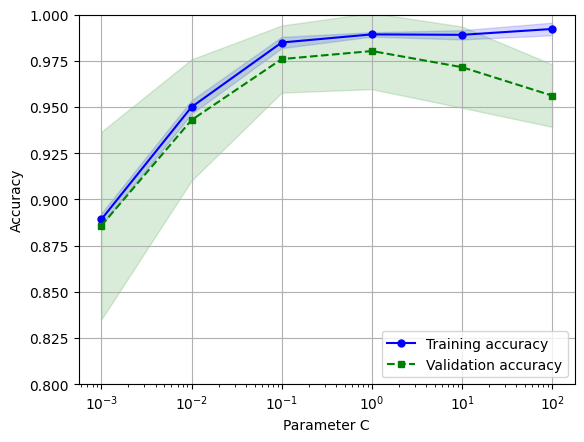

In [32]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
          estimator=pipe_lr,
          X=X_train,
          y=y_train,
          param_name='logisticregression__C',
          param_range=param_range,
          cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
          color='blue', marker='o',
          markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std,
          train_mean - train_std, alpha=0.15,
          color='blue')
plt.plot(param_range, test_mean,
          color='green', linestyle='--',
          marker='s', markersize=5,
          label='Validation accuracy')
plt.fill_between(param_range,
          test_mean + test_std,
          test_mean - test_std,
          alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

## Grid Search CV

In [37]:
pipe_svc = make_pipeline(StandardScaler(),
      SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1,
      1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
      'svc__kernel': ['linear']},
      {'svc__C': param_range,
      'svc__gamma': param_range,
      'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
      param_grid=param_grid,
      scoring='accuracy',
      cv=10,
      refit=True,
      n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [38]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 0.974


## Randomized Search CV

In [39]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [40]:
param_range = scipy.stats.loguniform(0.0001, 1000.0)

In [41]:
np.random.seed(1)
param_range.rvs(10)

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

In [42]:
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

In [43]:
param_grid = [{'svc__C': param_range,
      'svc__kernel': ['linear']},
      {'svc__C': param_range,
      'svc__gamma': param_range,
      'svc__kernel': ['rbf']}]
rs = RandomizedSearchCV(estimator=pipe_svc,
      param_distributions=param_grid,
      scoring='accuracy',
      refit=True,
      n_iter=20,
      cv=10,
      random_state=1,
      n_jobs=-1)
rs = rs.fit(X_train, y_train)
print(rs.best_score_)

print(rs.best_params_)


0.9780676328502416
{'svc__C': 0.05971247755848463, 'svc__kernel': 'linear'}


## Halving Search CV

In [45]:
hs = HalvingRandomSearchCV(pipe_svc,
    param_distributions=param_grid,
    n_candidates='exhaust',
    resource='n_samples',
    factor=1.5,
    random_state=1,
    n_jobs=-1)

In [46]:
hs = hs.fit(X_train, y_train)
print(hs.best_score_)

0.9617647058823529


In [47]:
print(hs.best_params_)

{'svc__C': 4.934834261073333, 'svc__kernel': 'linear'}


In [48]:
clf = hs.best_estimator_
print(f'Test accuracy: {hs.score(X_test, y_test):.3f}')

Test accuracy: 0.982


Tomado de Raschka, S (2023). con fines educativos.